In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn import metrics

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 

In [4]:
train_df = pd.read_csv('KDDTrainData.txt')
test_df = pd.read_csv('KDDTestData.txt')

# EXPLORING DATA

In [5]:
train_df

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [6]:
test_df

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [7]:
Columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

In [8]:
train_df.columns = Columns
test_df.columns  = Columns

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [11]:
pd.set_option('display.max_columns',50)

In [12]:
train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.0,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,0.002440,0.000266,0.114670,0.008739,0.001153,0.003549,0.0,0.000488,0.028435,79.021692,31.125316,0.102928,0.103640,0.238429,0.235145,0.740376,0.094075,0.098115,193.866699,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649,18.017833
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,0.049335,0.021061,8.041792,0.676857,0.048015,0.067831,0.0,0.022085,0.166214,128.538218,89.064396,0.295373,0.298337,0.416096,0.416193,0.412479,0.259143,0.253550,94.036867,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851,4.270409
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,123.000000,16.000000,0.000000,0.000000,0.250000,0.070000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [13]:
test_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.0,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.0,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [14]:
train_df.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

In [15]:
test_df.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

# DATA PREPROCESSING

In [16]:
# lists to hold our attack classifications
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

attack_labels = ['Normal','DoS','Probe','Privilege','Access']

In [17]:
train_df['attack'] = train_df['attack'].replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'], ['DoS','DoS','DoS','DoS','DoS','DoS','DoS','DoS','DoS','DoS','DoS'])
train_df['attack'] = train_df['attack'].replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],['Probe','Probe','Probe','Probe','Probe','Probe'])
train_df['attack'] = train_df['attack'].replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],['Priviledge','Priviledge','Priviledge','Priviledge','Priviledge','Priviledge','Priviledge'])
train_df['attack'] = train_df['attack'].replace(['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop','httptunnel','xlock'],['Access','Access','Access','Access','Access','Access','Access','Access','Access','Access','Access','Access','Access','Access','Access','Access','Access'])

In [18]:
test_df['attack'] = test_df['attack'].replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'], ['DoS','DoS','DoS','DoS','DoS','DoS','DoS','DoS','DoS','DoS','DoS'])
test_df['attack'] = test_df['attack'].replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],['Probe','Probe','Probe','Probe','Probe','Probe'])
test_df['attack'] = test_df['attack'].replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],['Priviledge','Priviledge','Priviledge','Priviledge','Priviledge','Priviledge','Priviledge'])
test_df['attack'] = test_df['attack'].replace(['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop','httptunnel','xlock'],['Access','Access','Access','Access','Access','Access','Access','Access','Access','Access','Access','Access','Access','Access','Access','Access','Access'])

In [19]:
train_df.attack.unique()

array(['DoS', 'normal', 'Probe', 'Access', 'Priviledge'], dtype=object)

In [20]:
test_df.attack.unique()

array(['normal', 'DoS', 'Access', 'Probe', 'Priviledge'], dtype=object)

In [21]:
for i in ['protocol_type',"service","flag"]:
    train_df[i] = train_df[i].astype('category').cat.codes

In [22]:
for i in ['protocol_type',"service","flag"]:
    test_df[i] = test_df[i].astype('category').cat.codes

In [23]:
train_df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,DoS,21
1,2,1,19,9,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,0,13,9,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,Probe,15
3,1,1,55,2,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,Probe,11
4,0,1,22,9,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [24]:
test_df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,2,44,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,DoS,19
2,0,1,24,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,1,24,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,1,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,DoS,21


In [25]:
train_df['attack'] = train_df['attack'].replace(['normal', 'DoS', 'Access', 'Probe', 'Priviledge'],[0,1,2,3,4])

In [26]:
test_df['attack'] = test_df['attack'].replace(['normal', 'DoS', 'Access', 'Probe', 'Priviledge'],[0,1,2,3,4])

In [27]:
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [28]:
test_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

# DATA VISUALIZATION

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


(0.0, 10.0)

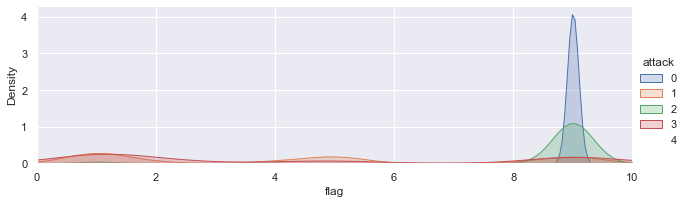

In [29]:
#Plotting Flag vs Attack field graph
facet= sns.FacetGrid(train_df,hue="attack", aspect=3)
facet.map(sns.kdeplot,'flag',shade= True)
facet.set(xlim=(0, train_df['flag'].max()))
facet.add_legend()
plt.xlim(0,10)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


(0.0, 1.0)

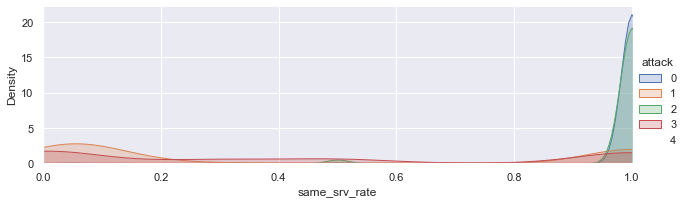

In [30]:
#Plotting Same_srv_rate vs Attack field graph
facet= sns.FacetGrid(train_df,hue="attack", aspect=3)
facet.map(sns.kdeplot,'same_srv_rate',shade= True)
facet.set(xlim=(0, train_df['same_srv_rate'].max()))
facet.add_legend()
plt.xlim(0,1)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


(0.0, 1.0)

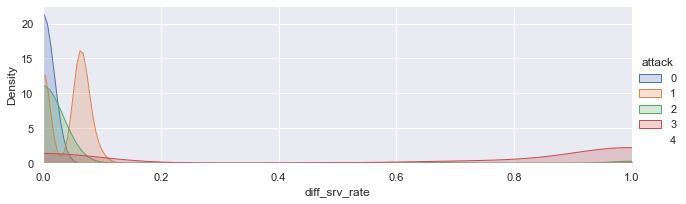

In [31]:
#Plotting diff_srv_rate vs Attack field graph
facet= sns.FacetGrid(train_df,hue="attack", aspect=3)
facet.map(sns.kdeplot,'diff_srv_rate',shade= True)
facet.set(xlim=(0, train_df['diff_srv_rate'].max()))
facet.add_legend()
plt.xlim(0,1)

(0.0, 69.0)

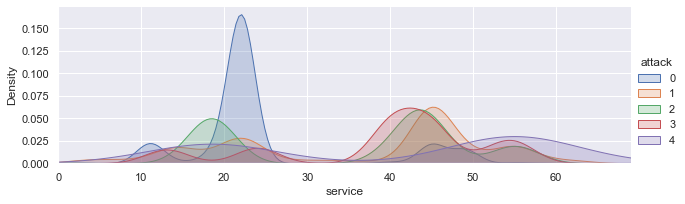

In [32]:
#Plotting service vs Attack field graph
facet= sns.FacetGrid(train_df,hue="attack", aspect=3)
facet.map(sns.kdeplot,'service',shade= True)
facet.set(xlim=(0, train_df['service'].max()))
facet.add_legend()
plt.xlim(0,69)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


(0.0, 2.0)

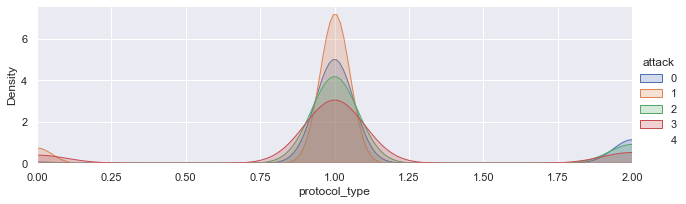

In [33]:
#Plotting protocol_type vs Attack field graph
facet= sns.FacetGrid(train_df,hue="attack", aspect=3)
facet.map(sns.kdeplot,'protocol_type',shade= True)
facet.set(xlim=(0, train_df['protocol_type'].max()))
facet.add_legend()
plt.xlim(0,2)

# Splitting Training and Testing Data

In [34]:
Y_trainval = train_df['attack'].values
X_trainval = train_df[['duration','protocol_type','service','flag','src_bytes','dst_bytes','wrong_fragment','hot','logged_in',
            'num_compromised','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
            'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
            'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
            'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate']]

Y_test = test_df['attack'].values
X_test = test_df[['duration','protocol_type','service','flag','src_bytes','dst_bytes','wrong_fragment','hot','logged_in',
            'num_compromised','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
            'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
            'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
            'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate']]

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

# RANDOM FOREST

In [35]:
acc = []
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_trainval_scaled, Y_trainval)

RandomForestClassifier(random_state=0)

In [36]:
PredictedOutput = rfc.predict(X_test_scaled)
rfc_score = rfc.score(X_test_scaled, Y_test)
rfc_recall = recall_score(Y_test, PredictedOutput, average='macro', pos_label=1)

In [37]:
rfc_score

0.9365335153843711

In [38]:
m = 'Random Forest'
acc.append([m, rfc_score, rfc_recall])

Feature: 0, Score: 0.04393
Feature: 1, Score: 0.03243
Feature: 2, Score: 0.05190
Feature: 3, Score: 0.06706
Feature: 4, Score: 0.06866
Feature: 5, Score: 0.12155
Feature: 6, Score: 0.00096
Feature: 7, Score: 0.00937
Feature: 8, Score: 0.01594
Feature: 9, Score: 0.00545
Feature: 10, Score: 0.05821
Feature: 11, Score: 0.04334
Feature: 12, Score: 0.00958
Feature: 13, Score: 0.00581
Feature: 14, Score: 0.01221
Feature: 15, Score: 0.00781
Feature: 16, Score: 0.04219
Feature: 17, Score: 0.06477
Feature: 18, Score: 0.02140
Feature: 19, Score: 0.01841
Feature: 20, Score: 0.04410
Feature: 21, Score: 0.04858
Feature: 22, Score: 0.05285
Feature: 23, Score: 0.03258
Feature: 24, Score: 0.01822
Feature: 25, Score: 0.01141
Feature: 26, Score: 0.01164
Feature: 27, Score: 0.04984
Feature: 28, Score: 0.02981


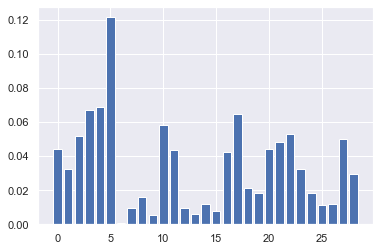

In [41]:
importance = rfc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [39]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df_scaled = scaler.transform(input_df)
    output = rfc.predict(input_df_scaled)[0]
    if output==0:
        result='Normal'
    elif output==1:
        result='DOS'
    elif output==2:
        result='Access'
    elif output==3:
        result='Probe'
    elif output==4:
        result='Priviledge'
    return result

In [40]:
sample_input_access = {
    'duration':0,'protocol_type':1,'service':20,'flag':9,'src_bytes':334,'dst_bytes':0,'wrong_fragment':0,'hot':0,
            'logged_in':1,'num_compromised':0,'count':2,'srv_count':2,
            'serror_rate':0,'srv_serror_rate':0,'rerror_rate':0,'srv_rerror_rate':0,'same_srv_rate':1,'diff_srv_rate':0,'srv_diff_host_rate':0,
            'dst_host_count':2,'dst_host_srv_count':20,'dst_host_same_srv_rate':1,'dst_host_diff_srv_rate':0,'dst_host_same_src_port_rate':1,
            'dst_host_srv_diff_host_rate':0.20,'dst_host_serror_rate':0,'dst_host_srv_serror_rate':0,'dst_host_rerror_rate':0,
            'dst_host_srv_rerror_rate':0
}

In [41]:
sample_input_normal = {
    'duration':0,'protocol_type':1,'service':24,'flag':9,'src_bytes':232,'dst_bytes':8153,'wrong_fragment':0,'hot':0,
            'logged_in':1,'num_compromised':0,'count':5,'srv_count':5,
            'serror_rate':0.2,'srv_serror_rate':0.2,'rerror_rate':0,'srv_rerror_rate':0,'same_srv_rate':1,'diff_srv_rate':0,'srv_diff_host_rate':0,
            'dst_host_count':30,'dst_host_srv_count':255,'dst_host_same_srv_rate':1,'dst_host_diff_srv_rate':0,'dst_host_same_src_port_rate':0.3,
            'dst_host_srv_diff_host_rate':0.04,'dst_host_serror_rate':0.03,'dst_host_srv_serror_rate':0.01,'dst_host_rerror_rate':0,
            'dst_host_srv_rerror_rate':0.01
}

In [42]:
sample_input_dos = {
    'duration':0,'protocol_type':1,'service':49,'flag':5,'src_bytes':0,'dst_bytes':0,'wrong_fragment':0,'hot':0,
            'logged_in':0,'num_compromised':0,'count':123,'srv_count':6,
            'serror_rate':1,'srv_serror_rate':1,'rerror_rate':0,'srv_rerror_rate':0,'same_srv_rate':0.05,'diff_srv_rate':0.07,'srv_diff_host_rate':0,
            'dst_host_count':255,'dst_host_srv_count':26,'dst_host_same_srv_rate':0.10,'dst_host_diff_srv_rate':0.05,'dst_host_same_src_port_rate':0,
            'dst_host_srv_diff_host_rate':0,'dst_host_serror_rate':1,'dst_host_srv_serror_rate':1,'dst_host_rerror_rate':0,
            'dst_host_srv_rerror_rate':0
}

In [43]:
sample_input_priviledge = {
    'duration':84,'protocol_type':1,'service':55,'flag':9,'src_bytes':277,'dst_bytes':1089,'wrong_fragment':0,'hot':2,
            'logged_in':1,'num_compromised':1,'count':1,'srv_count':1,
            'serror_rate':0,'srv_serror_rate':0,'rerror_rate':0,'srv_rerror_rate':0,'same_srv_rate':1,'diff_srv_rate':0,'srv_diff_host_rate':0,
            'dst_host_count':255,'dst_host_srv_count':1,'dst_host_same_srv_rate':0,'dst_host_diff_srv_rate':0.07,'dst_host_same_src_port_rate':0,
            'dst_host_srv_diff_host_rate':0,'dst_host_serror_rate':0.14,'dst_host_srv_serror_rate':0,'dst_host_rerror_rate':0.86,
            'dst_host_srv_rerror_rate':0
}

In [44]:
predict_input(sample_input_normal)

'Normal'

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (2).

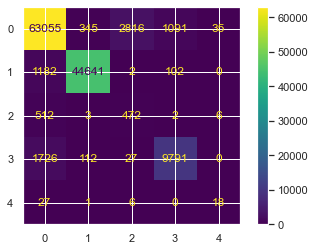

In [46]:
confusion_matrix = metrics.confusion_matrix(Y_test , PredictedOutput)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# K Nearest Neighbours

In [47]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn = knn.fit(X_trainval_scaled , Y_trainval)

In [48]:
PredictedOutput1 = knn.predict(X_test_scaled)
knn_score = knn.score(X_test_scaled, Y_test)
knn_recall = recall_score(Y_test, PredictedOutput1, average='macro', pos_label=1)

In [49]:
knn_score

0.8922855872733624

In [50]:
m = 'K Nearest Neighbours'
acc.append([m, knn_score, knn_recall])

In [51]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df_scaled = scaler.transform(input_df)
    output = knn.predict(input_df_scaled)[0]
    if output==0:
        result='Normal'
    elif output==1:
        result='DOS'
    elif output==2:
        result='Access'
    elif output==3:
        result='Probe'
    elif output==4:
        result='Priviledge'
    return result

In [52]:
predict_input(sample_input_normal)

'Normal'

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (2).

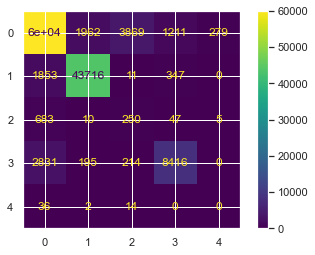

In [59]:
confusion_matrix = metrics.confusion_matrix(Y_test , PredictedOutput1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Support Vector Machine

In [53]:
svm = SVC(kernel='rbf', gamma=0.001, C=1000)
svm.fit(X_trainval_scaled, Y_trainval)

SVC(C=1000, gamma=0.001)

In [54]:
PredictedOutput2 = svm.predict(X_test_scaled)
svm_score = svm.score(X_test_scaled, Y_test)
svm_recall = recall_score(Y_test, PredictedOutput2, average='macro', pos_label=1)

In [55]:
svm_score

0.8590321658781317

In [56]:
m = 'Support Vector Machine'
acc.append([m, svm_score, svm_recall])

In [57]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df_scaled = scaler.transform(input_df)
    output = svm.predict(input_df_scaled)[0]
    if output==0:
        result='Normal'
    elif output==1:
        result='DOS'
    elif output==2:
        result='Access'
    elif output==3:
        result='Probe'
    elif output==4:
        result='Privilege'
    return result

In [58]:
predict_input(sample_input_normal)

'Normal'

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (2).

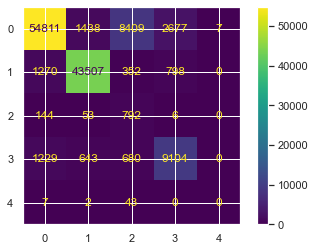

In [60]:
confusion_matrix = metrics.confusion_matrix(Y_test , PredictedOutput2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [60]:
# Performance Metric for each model
result = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Recall'])
result[['Model', 'Accuracy', 'Recall']]

,Model,Accuracy,Recall
0,Random Forest,0.936534,0.713772
1,K Nearest Neighbours,0.892286,0.563287
2,Support Vector Machine,0.859032,0.667653


Text(0.5, 1.0, 'Comparison between Models')

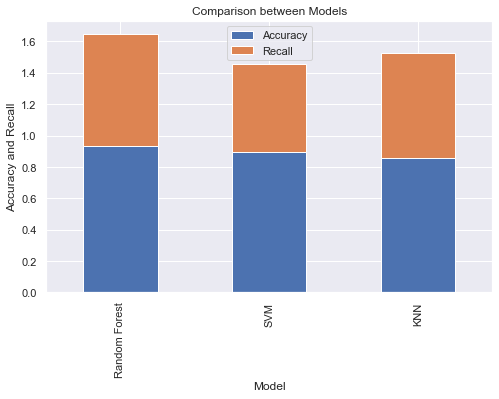

In [61]:
result.index = ['Random Forest','SVM','KNN']
result.plot(kind='bar',stacked=True,figsize=(8,5))
plt.xlabel('Model')
plt.ylabel('Accuracy and Recall')
plt.legend()
plt.title('Comparison between Models')

In [45]:
import tkinter as tk
from tkinter import ttk

win = tk.Tk()
win.geometry('630x500')
win.title('Attacks Classification')

#Column 1 
pt=ttk.Label(win,text="Protocol Type -",font=("Calibri", 20))
pt.grid(row=0,column=0,sticky=tk.W)
pt_var=tk.StringVar()
pt_entrybox=ttk.Entry(win,width=16,textvariable=pt_var, font=('Calibri 18'))
pt_entrybox.grid(row=0,column=1)
#Column 2
flg=ttk.Label(win,text="Flag -",font=("Calibri", 20))
flg.grid(row=1,column=0,sticky=tk.W)
flg_var=tk.StringVar()
flg_entrybox=ttk.Entry(win,width=16,textvariable=flg_var, font=('Calibri 18'))
flg_entrybox.grid(row=1,column=1)
#Column 3
cnt=ttk.Label(win,text="Count -",font=("Calibri", 20))
cnt.grid(row=2,column=0,sticky=tk.W)
cnt_var=tk.StringVar()
cnt_entrybox=ttk.Entry(win,width=16,textvariable=cnt_var, font=('Calibri 18'))
cnt_entrybox.grid(row=2,column=1)
#Column 4
ssr=ttk.Label(win,text="Same_srv_rate -",font=("Calibri", 20))
ssr.grid(row=3,column=0,sticky=tk.W)
ssr_var=tk.StringVar()
ssr_entrybox=ttk.Entry(win,width=16,textvariable=ssr_var, font=('Calibri 18'))
ssr_entrybox.grid(row=3,column=1)
#Column 5
dsr=ttk.Label(win,text="Diff_srv_rate -",font=("Calibri", 20))
dsr.grid(row=4,column=0,sticky=tk.W)
dsr_var=tk.StringVar()
dsr_entrybox=ttk.Entry(win,width=16,textvariable=dsr_var, font=('Calibri 18'))
dsr_entrybox.grid(row=4,column=1)
#Column 6
hcnt=ttk.Label(win,text="Dst_host_count -",font=("Calibri", 20))
hcnt.grid(row=5,column=0,sticky=tk.W)
hcnt_var=tk.StringVar()
hcnt_entrybox=ttk.Entry(win,width=16,textvariable=hcnt_var, font=('Calibri 18'))
hcnt_entrybox.grid(row=5,column=1)
#Column 7
scnt=ttk.Label(win,text="Dst_host_srv_count -",font=("Calibri", 20))
scnt.grid(row=6,column=0,sticky=tk.W)
scnt_var=tk.StringVar()
scnt_entrybox=ttk.Entry(win,width=16,textvariable=scnt_var, font=('Calibri 18'))
scnt_entrybox.grid(row=6,column=1)
#Column 8
dhs=ttk.Label(win,text="Dst_host_same_srv_rate -",font=("Calibri", 20))
dhs.grid(row=7,column=0,sticky=tk.W)
dhs_var=tk.StringVar()
dhs_entrybox=ttk.Entry(win,width=16,textvariable=dhs_var, font=('Calibri 18'))
dhs_entrybox.grid(row=7,column=1)
#Column 9
dhd=ttk.Label(win,text="Dst_host_diff_srv_rate -",font=("Calibri", 20))
dhd.grid(row=8,column=0,sticky=tk.W)
dhd_var=tk.StringVar()
dhd_entrybox=ttk.Entry(win,width=16,textvariable=dhd_var, font=('Calibri 18'))
dhd_entrybox.grid(row=8,column=1)
#Column 10
src=ttk.Label(win,text="Dst_host_same_src_port_rate -",font=("Calibri", 20))
src.grid(row=9,column=0,sticky=tk.W)
src_var=tk.StringVar()
src_entrybox=ttk.Entry(win,width=16,textvariable=src_var, font=('Calibri 18'))
src_entrybox.grid(row=9,column=1)
#Column 11
serr=ttk.Label(win,text="Dst_host_serror_rate -",font=("Calibri", 20))
serr.grid(row=10,column=0,sticky=tk.W)
serr_var=tk.StringVar()
serr_entrybox=ttk.Entry(win,width=16,textvariable=serr_var, font=('Calibri 18'))
serr_entrybox.grid(row=10,column=1)
#Column 12
srvserr=ttk.Label(win,text="Dst_host_srv_serror_rate -",font=("Calibri", 20))
srvserr.grid(row=11,column=0,sticky=tk.W)
srvserr_var=tk.StringVar()
srvserr_entrybox=ttk.Entry(win,width=16,textvariable=srvserr_var, font=('Calibri 18'))
srvserr_entrybox.grid(row=11,column=1)

def run():
    Predict_entrybox.delete(0,'end')
    
    temp = pt_var.get()
    if temp=='icmp':
        pt=0
    elif temp=='tcp':
        pt=1
    elif temp=='udp':
        pt=2
    
    temp2 = flg_var.get()
    if temp2=='SF':
        flg=9
    elif temp2=='S0':
        flg=5
    elif temp2=='REJ':
        flg=1
    elif temp2=='RSTR':
        flg=4
    elif temp2=='SH':
        flg=10
    elif temp2=='RSTO':
        flg=2
    elif temp2=='S1':
        flg=6
    elif temp2=='RSTOS0':
        flg=3
    elif temp2=='S3':
        flg=8
    elif temp2=='S2':
        flg=7
    elif temp2=='OTH':
        flg=0
    
    sample_input1 = {
    'duration':0,'protocol_type':pt ,'service':20,'flag':flg ,'src_bytes':334,'dst_bytes':0,'wrong_fragment':0,'hot':0,
    'logged_in':1,'num_compromised':0,'count':float(cnt_var.get()),'srv_count':2,
    'serror_rate':0,'srv_serror_rate':0,'rerror_rate':0,'srv_rerror_rate':0,'same_srv_rate':float(ssr_var.get()),'diff_srv_rate':float(dsr_var.get()),'srv_diff_host_rate':0,
    'dst_host_count':float(hcnt_var.get()),'dst_host_srv_count':float(scnt_var.get()),'dst_host_same_srv_rate':float(dhs_var.get()),'dst_host_diff_srv_rate':float(dhd_var.get()),'dst_host_same_src_port_rate':float(src_var.get()),
    'dst_host_srv_diff_host_rate':0.20,'dst_host_serror_rate':float(serr_var.get()),'dst_host_srv_serror_rate':float(srvserr_var.get()),'dst_host_rerror_rate':0,
    'dst_host_srv_rerror_rate':0
    }
    
    output=predict_input(sample_input1)
    Predict_entrybox.insert(1,str(output))
    
Predict_entrybox=ttk.Entry(win,width=16, font=('Calibri 18'))
Predict_entrybox.grid(row=20,column=1,pady=10)
Predict_entrybox.insert(1,str(''))
Predict_button=ttk.Button(win,text="Predict",command=run)
Predict_button.grid(row=20,column=0,pady=10)
win.mainloop()